## Import Necessary Libraries

In [1]:
import os 
import pandas as pd

### Merge Data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

### Read in Updated Data Frame

In [3]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
 all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
 all_data.isnull().sum()

    

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Data Exploration and Cleaning

#### Drop rows of NaN

In [6]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
 all_data = all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
 #After dropping NaN values
all_data.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
 # Found duplicate rows and column names inside the table.
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Get rid of text in order date column

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']


#### Make columns correct type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
#convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #convert to float

#### Augment Data with Additional Columns

#### Add a month column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a city column

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})") # f-string
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


#### Remove purchase address (Privacy concerns)

In [14]:
all_data.drop('Purchase Address', axis=1, inplace=True)
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles(CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [15]:
 all_data['Sales'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'].astype('float') # Making a Sales Column

0          11.95
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      2.99
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Price Each, Length: 185950, dtype: float64

In [16]:
df = pd.DataFrame(all_data.groupby(['Month']).sum())
df = df.drop('Price Each', axis=1)
print(df)


       Quantity Ordered  Sales
Month                         
1                 10903  10903
2                 13449  13449
3                 17005  17005
4                 20558  20558
5                 18667  18667
6                 15253  15253
7                 16072  16072
8                 13448  13448
9                 13109  13109
10                22703  22703
11                19798  19798
12                28114  28114


In [17]:
all_data['Month'].corr(all_data['Quantity Ordered']) #finding correlation

0.0007910574905506158

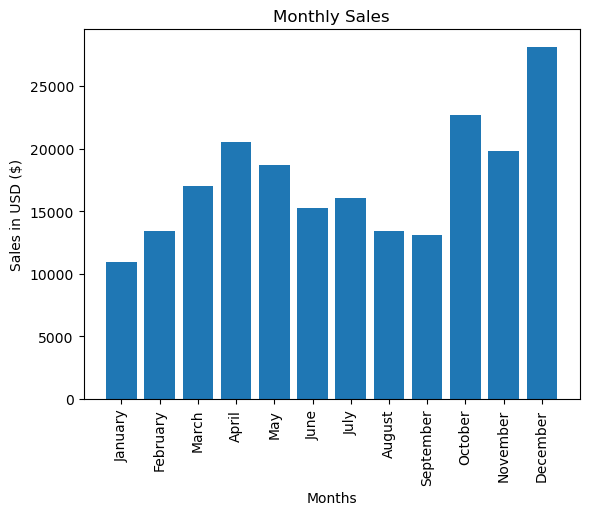

In [18]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months,['January','February','March','April','May','June','July','August',
'September','October','November','December'],rotation='vertical')

plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.title('Monthly Sales')
plt.show()

#### Question number 2: What city sold the most products?


In [19]:
df = pd.DataFrame(all_data.groupby(['City']).sum())
df = df.drop(['Price Each','Month'], axis=1)
print(df)

                   Quantity Ordered  Sales
City                                      
Atlanta(GA)                   16602  16602
Austin(TX)                    11153  11153
Boston(MA)                    22528  22528
Dallas(TX)                    16730  16730
Los Angeles(CA)               33289  33289
New York City(NY)             27932  27932
Portland(ME)                   2750   2750
Portland(OR)                  11303  11303
San Francisco(CA)             50239  50239
Seattle(WA)                   16553  16553


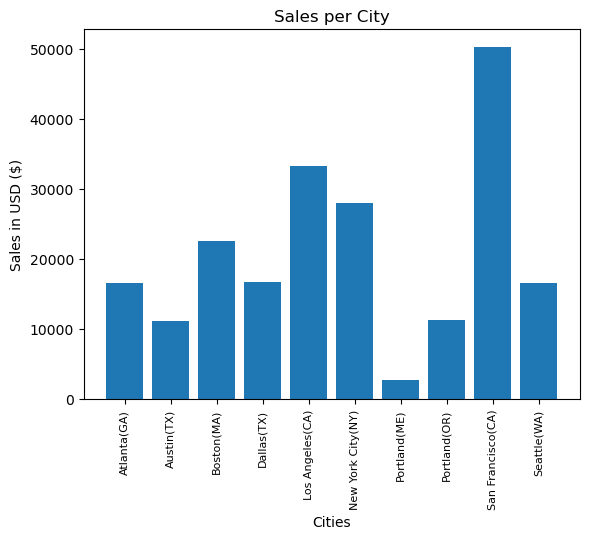

In [20]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.title('Sales per City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer’s buying product?

In [21]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,Dallas(TX),2,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,Boston(MA),1,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,4,Los Angeles(CA),1,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,Los Angeles(CA),1,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,Los Angeles(CA),1,9,27,1


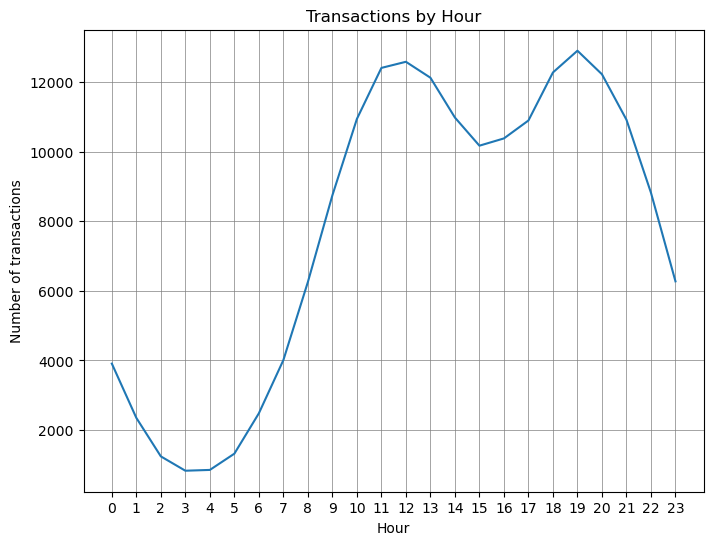

In [22]:
 # Get keys and sales counts
keys = [pair for pair, df in all_data.groupby(['Hour'])]
sales = all_data.groupby(['Hour']).count()['Count']

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(keys, sales)

# Add labels and formatting
plt.xlabel('Hour')
plt.ylabel('Number of transactions')
plt.title('Transactions by Hour')
plt.xticks(keys)
plt.grid(linewidth=0.5, color='gray', linestyle='-')
plt.show()


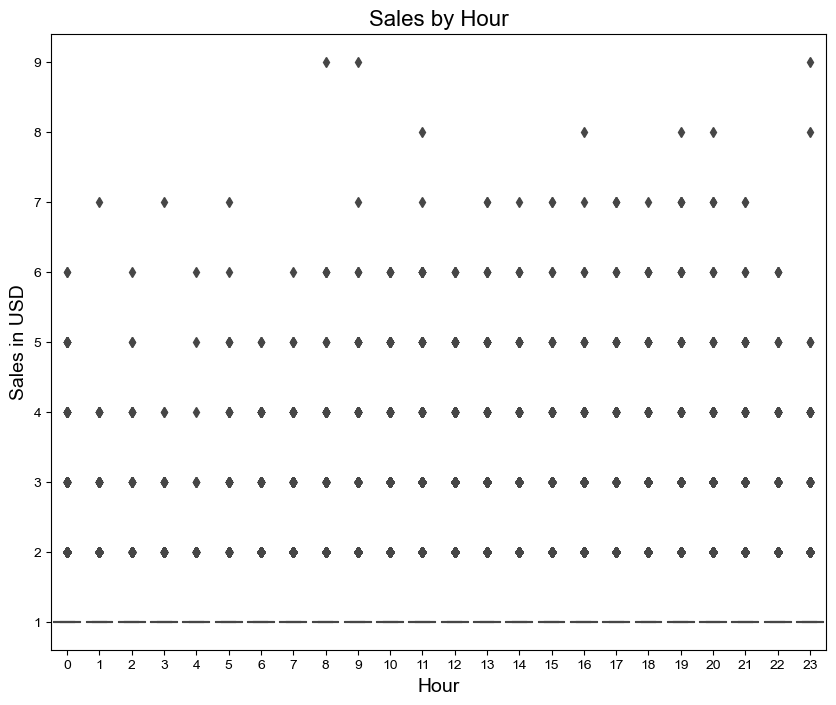

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x='Hour', y='Sales', data=all_data)
sns.set(style="ticks", font_scale=1.2)

# Add labels and formatting
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Sales in USD', fontsize=14)
plt.title('Sales by Hour', fontsize=16)

plt.show()


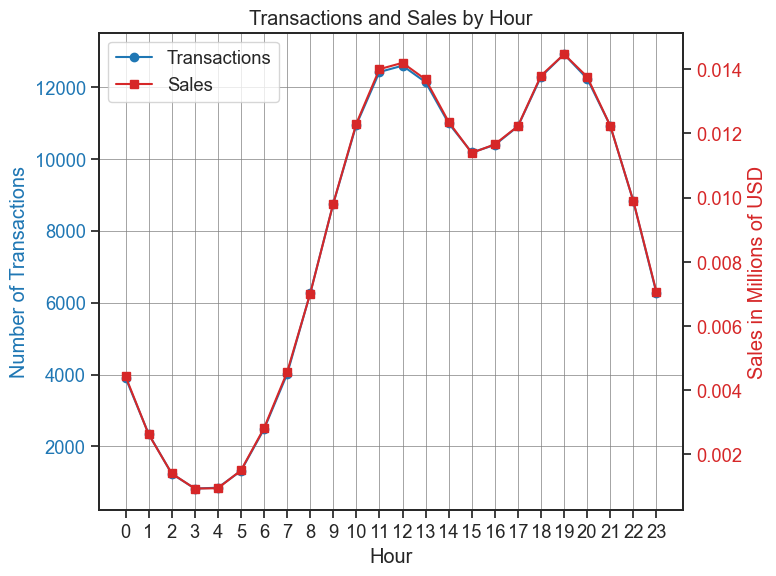

In [37]:
import matplotlib.pyplot as plt

# Get keys and sales counts
keys = [pair for pair, df in all_data.groupby(['Hour'])]
transactions = all_data.groupby(['Hour']).count()['Count']
hourly_sales = all_data.groupby('Hour').sum()['Sales']
hourly_sales.index = hourly_sales.index.astype(int)

# Convert sales to millions
hourly_sales = hourly_sales / 1000000
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot transactions
color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Transactions', color=color)
ax1.plot(keys, transactions, color=color, marker='o', linestyle='-', label='Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linewidth=0.5, color='gray', linestyle='-')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot sales in millions
color = 'tab:red'
ax2.set_ylabel('Sales in Millions of USD', color=color)
ax2.plot(keys, hourly_sales, color=color, marker='s', linestyle='-', label='Sales')
ax2.tick_params(axis='y', labelcolor=color)

# Set y-axis format to millions
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Transactions and Sales by Hour')
plt.xticks(keys)

fig.tight_layout()
plt.show()


#### Question 4:  What products are most often sold together?

In [29]:
import pandas as pd

df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()  # Use .copy() to create a copy of the DataFrame.

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

print(df2)
    

       Order ID                                            Grouped
3        176560                      Google Phone,Wired Headphones
18       176574                  Google Phone,USB-C Charging Cable
30       176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32       176586                AAA Batteries (4-pack),Google Phone
119      176672      Lightning Charging Cable,USB-C Charging Cable
...         ...                                                ...
186781   259296  Apple Airpods Headphones,Apple Airpods Headphones
186783   259297  iPhone,Lightning Charging Cable,Lightning Char...
186791   259303       34in Ultrawide Monitor,AA Batteries (4-pack)
186803   259314            Wired Headphones,AAA Batteries (4-pack)
186841   259350                  Google Phone,USB-C Charging Cable

[7136 rows x 2 columns]


#### Question 5: What product sold the most? Why do you think it sold the most?

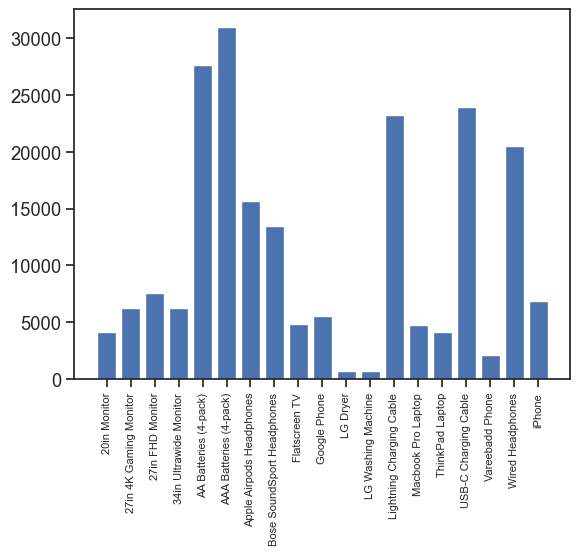

In [30]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()
 

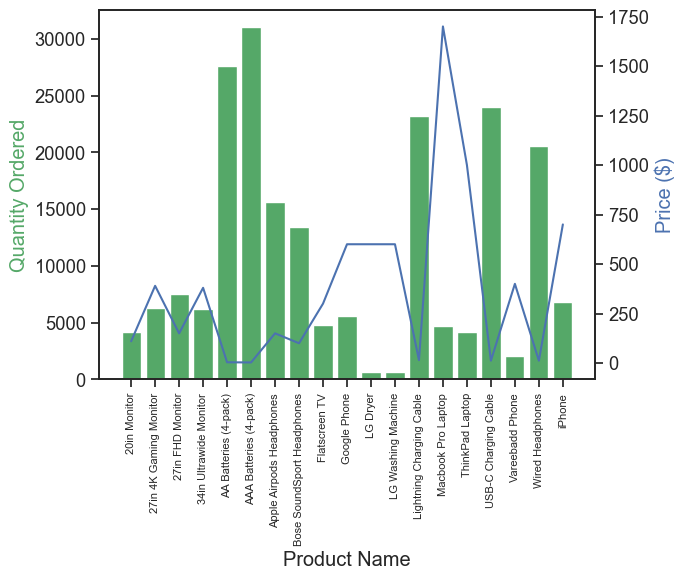

In [32]:
import matplotlib.pyplot as plt

prices = all_data.groupby('Product').mean()['Price Each']
keys = prices.index
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(keys)  # Set the locations of the ticks explicitly.
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()  # Use plt.show() instead of fig.show()
